In [477]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress

In [478]:
population_data_to_load = 'raw data files/Clean Data/2018_populations.csv'
summer_edited_load = 'raw data files/Clean Data/summer_edited.csv'
winter_edited_load = 'raw data files/Clean Data/winter_edited.csv'
athlete_data_to_load = 'raw data files/Olympic data/athlete_events.csv'


population_data = pd.read_csv(population_data_to_load)
summer_edited = pd.read_csv(summer_edited_load)
winter_edited = pd.read_csv(winter_edited_load)
athlete_data = pd.read_csv(athlete_data_to_load)

In [489]:
winter_edited = winter_edited.rename(columns= {"Grand Total": "Weighted Total"})
population_data = population_data.rename(columns= {"Country (code)": "Country Code"})
population_data["Population (2018)"] = population_data["Population (2018)"].div(1000000)

In [490]:
medals_merged = pd.merge(winter_edited, summer_edited, on="Country Code")

medals_merged["Combined Total"] = medals_merged["Weighted Total_x"] + medals_merged["Weighted Total_y"]

medals_merged = medals_merged.rename(columns= {"Weighted Total_x": "Winter Total", "Weighted Total_y": "Summer Total"})

medals_population_merged = pd.merge(medals_merged, population_data, on="Country Code")
medals_population_merged.head()

,Country Code,Winter Total,Summer Total,Combined Total,Population (2018)
0,AUS,28,1966,1994,0.000025
1,AUT,447,87,534,0.000009
2,BEL,1,93,94,0.000011
3,BLR,31,184,215,0.000009
4,CAN,1193,707,1900,0.000037


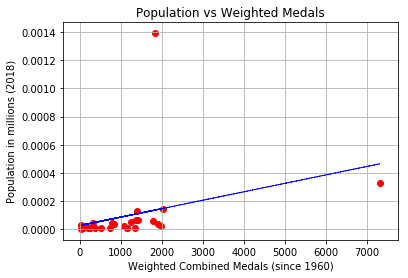

In [491]:
#Plot of combined medals and population 

(slope, intercept, r_value, _, _) = linregress(medals_population_merged["Combined Total"], medals_population_merged["Population (2018)"])
fit = slope *  medals_population_merged["Combined Total"] + intercept

plt.title("Population vs Weighted Medals")
plt.xlabel("Weighted Combined Medals (since 1960)")
plt.ylabel("Population in millions (2018)")
plt.grid()

plt.plot(medals_population_merged["Combined Total"], fit, 'b--', linewidth = 1)
plt.scatter(medals_population_merged["Combined Total"], medals_population_merged["Population (2018)"], color = "red")
plt.show()

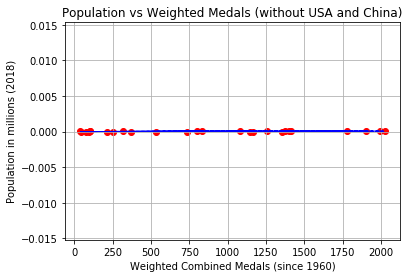

R Squared: 0.31983399752594427


In [492]:
medals_population_merged = medals_population_merged[medals_population_merged["Country Code"] != "USA"]
medals_population_merged = medals_population_merged[medals_population_merged["Country Code"] != "CHN"]

plt.scatter(medals_population_merged["Combined Total"], medals_population_merged["Population (2018)"], color = "red")

(slope, intercept, r_value, _, _) = linregress(medals_population_merged["Combined Total"], medals_population_merged["Population (2018)"])
fit = slope *  medals_population_merged["Combined Total"] + intercept

plt.plot(medals_population_merged["Combined Total"], fit, 'b--', linewidth = 1)

plt.title("Population vs Weighted Medals (without USA and China)")
plt.xlabel("Weighted Combined Medals (since 1960)")
plt.ylabel("Population in millions (2018)")
plt.grid()

plt.show()

r_squared_total = r_value **2
print(f"R Squared: {r_squared_total_nonUS}")

In [493]:
medals_population_summer = pd.merge(summer_edited, population_data, on="Country Code")
medals_population_summer.head()

,Country Code,Weighted Total,Population (2018)
0,MAR,39,0.000036
1,AFG,2,0.000037
2,ARG,333,0.000044
3,ARM,15,0.000003
4,AUS,1966,0.000025


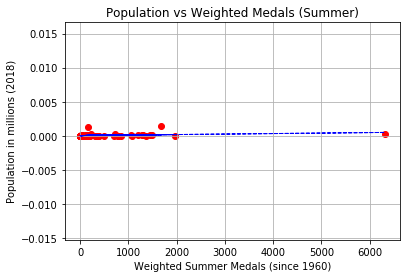

In [494]:
medals_population_summer['Weighted Total'] = medals_population_summer['Weighted Total'].astype(float)

x = medals_population_summer["Weighted Total"].values
y = medals_population_summer["Population (2018)"].values

# Plot of Summer Medals vs Population 

mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = linregress(x[mask], y[mask])

plt.scatter(x[mask], y[mask], color = "red")

fit = slope *  x[mask] + intercept

plt.plot(x[mask], fit, 'b--', linewidth = 1)

plt.title("Population vs Weighted Medals (Summer)")
plt.xlabel("Weighted Summer Medals (since 1960)")
plt.ylabel("Population in millions (2018)")
plt.grid()

plt.show()

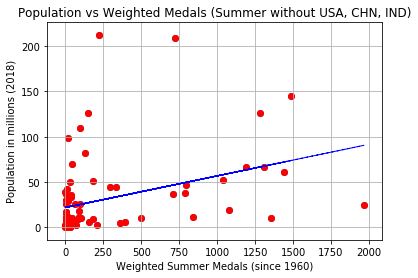

R Squared: 0.13223887930008849


In [485]:
medals_population_summer = medals_population_summer[medals_population_summer["Country Code"] != "USA"]
medals_population_summer = medals_population_summer[medals_population_summer["Country Code"] != "CHN"]
medals_population_summer = medals_population_summer[medals_population_summer["Country Code"] != "IND"]

x = medals_population_summer["Weighted Total"].values
y = medals_population_summer["Population (2018)"].values

mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = linregress(x[mask], y[mask])

plt.scatter(x[mask], y[mask])

fit = slope *  x[mask] + intercept

plt.plot(x[mask], fit, 'b--', linewidth = 1)

plt.scatter(medals_population_summer["Weighted Total"], medals_population_summer["Population (2018)"], color = "red")
plt.title("Population vs Weighted Medals (Summer without USA, CHN, IND)")
plt.xlabel("Weighted Summer Medals (since 1960)")
plt.ylabel("Population in millions (2018)")
plt.grid()

plt.show()

r_squared_summer = r_value ** 2 

print(f"R Squared: {r_squared_summer}")

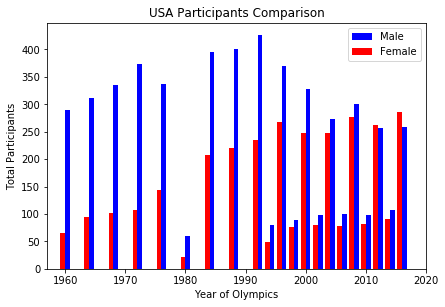

In [486]:
#Male vs Female for US: 

usa_data = athlete_data.loc[athlete_data['Team']=='United States']

usa_male_data = usa_data.loc[usa_data['Sex']=='M'].groupby(['Year'])['ID'].nunique()
usa_male_data_df = pd.DataFrame(usa_male_data).rename(columns = {'ID':'Male'})

usa_female_data = usa_data.loc[usa_data['Sex']=='F'].groupby(['Year'])['ID'].nunique()
usa_female_data_df = pd.DataFrame(usa_female_data).rename(columns = {'ID':'Female'})

usa_m_f = pd.merge(usa_male_data_df, usa_female_data_df, on="Year")

bar_width = 0.4
plt.bar( usa_m_f.index + bar_width, usa_m_f["Male"], label= "Male", color="blue")
plt.bar( usa_m_f.index - bar_width, usa_m_f["Female"], label= "Female", color="red")


plt.legend()
plt.tight_layout()
plt.title("USA Participants Comparison")
plt.xlabel("Year of Olympics")
plt.ylabel("Total Participants")
#plt.xticks(usa_m_f.index)
plt.xlim([1957, 2020])

plt.show()

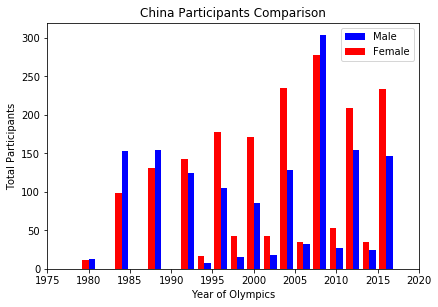

In [487]:
#Male vs Female for China

china_data = athlete_data.loc[athlete_data['Team']=='China']

china_male_data = china_data.loc[china_data['Sex']=='M'].groupby(['Year'])['ID'].nunique()
china_male_data_df = pd.DataFrame(china_male_data).rename(columns = {'ID':'Male'})

china_female_data = china_data.loc[china_data['Sex']=='F'].groupby(['Year'])['ID'].nunique()
china_female_data_df = pd.DataFrame(china_female_data).rename(columns = {'ID':'Female'})

china_m_f = pd.merge(china_male_data_df, china_female_data_df, on="Year")

bar_width = 0.4
plt.bar( china_m_f.index + bar_width, china_m_f["Male"], label= "Male", color="blue")
plt.bar( china_m_f.index - bar_width, china_m_f["Female"], label= "Female", color="red")
plt.xlim([1975, 2020])
plt.legend()
plt.tight_layout()
plt.title("China Participants Comparison")
plt.xlabel("Year of Olympics")
plt.ylabel("Total Participants")

plt.show()

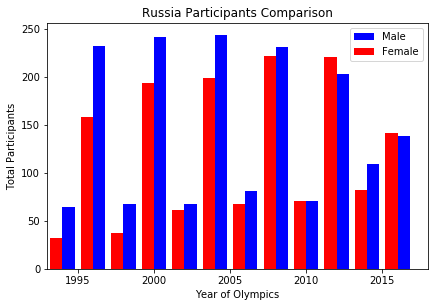

In [488]:
#Male vs Female for Russia

rus_data = athlete_data.loc[athlete_data['Team']=='Russia']

rus_male_data = rus_data.loc[rus_data['Sex']=='M'].groupby(['Year'])['ID'].nunique()
rus_male_data_df = pd.DataFrame(rus_male_data).rename(columns = {'ID':'Male'})

rus_female_data = rus_data.loc[rus_data['Sex']=='F'].groupby(['Year'])['ID'].nunique()
rus_female_data_df = pd.DataFrame(rus_female_data).rename(columns = {'ID':'Female'})

rus_m_f = pd.merge(rus_male_data_df, rus_female_data_df, on="Year")

bar_width = 0.4
plt.bar( rus_m_f.index + bar_width, rus_m_f["Male"], label= "Male", color="blue")
plt.bar( rus_m_f.index - bar_width, rus_m_f["Female"], label= "Female", color="red")
plt.xlim([1993, 2018])
plt.legend()
plt.tight_layout()
plt.title("Russia Participants Comparison")
plt.xlabel("Year of Olympics")
plt.ylabel("Total Participants")

plt.show()